# Word Cloud data viz based on popular keywords on certain wiki page.

In [169]:
wikiURL = 'https://id.wikipedia.org/wiki/Universitas_Telkom'

In [170]:
# parse the html data
import requests

plainText = requests.get(wikiURL).content.decode()
plainText[:2723]

'<!DOCTYPE html>\n<html class="client-nojs" lang="id" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.",".\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","Januari","Februari","Maret","April","Mei","Juni","Juli","Agustus","September","Oktober","November","Desember"],"wgRequestId":"bdbc7272-8b41-4e2f-8acf-45d4d001cb4d","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Universitas_Telkom","wgTitle":"Universitas Telkom","wgCurRevisionId":21639157,"wgRevisionId":21639157,"wgArticleId":1389573,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 sumber berbahasa Inggris (en)","Galat CS1: tidak memiliki penulis atau penyunting","

In [171]:
# transform data
from html.parser import HTMLParser

class Parser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')
        self.res += ' '+data.replace("\t", '')
        self.res += ' '+data.replace("\n", '')
        self.res += ' '+data.replace("\n\t", '')
        self.res += ' '+data.replace('sunting | sunting sumber', '')
        self.res += ' '+data.replace('diakses tanggal', '')
        self.res += ' '+data.replace('diarsipkan', '')
        
parser = Parser()
parser.feed(plainText)
plainText = parser.res
plainText[:2723]

' Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas Universitas Telkom - Wikipedia bahasa Indonesia, ensiklopedia bebas Lompat ke isi Lompat ke isi Lompat ke isi Lompat ke isi Lompat ke isi Lompat ke isi Lompat ke isi Buka/tutup bilah samping Buka/tutup bilah samping Buka/tutup bilah samping Buka/tutup bilah samping Buka/tutup bilah samping Buka/tutup bilah samping Buka/tutup bilah samping Pencarian Pencarian Pencarian Pencarian Pencarian Pencarian Pencarian Buat akun baru Buat akun baru Buat akun baru Buat akun baru Buat akun baru Buat akun baru Buat akun baru Perkakas pribadi Perkakas pribadi Perkakas pribadi Perkakas pribadi Perkak

In [172]:
import nlp_rake

nlpExtractor = nlp_rake.Rake(min_chars=15, max_words=5, min_freq=15)
processedText = nlpExtractor.apply(plainText)
processedText

[('s1 desain komunikasi visual', 14.40960516541912),
 ('forum alumni universitas telkom', 13.571328698789559),
 ('fakultas rekayasa industri', 9.54609356725146),
 ('fakultas ilmu terapan', 9.2295),
 ('s1 teknik elektro', 9.208063435336163),
 ('s1 teknik telekomunikasi', 9.158476658476658),
 ('s1 teknik industri', 9.129236892394786),
 ('fakultas teknik elektro', 8.905468840741568),
 ('fakultas industri kreatif', 8.812760233918128),
 ('telkom university', 6.117648875710403),
 ('fakultas komunikasi', 5.985798449612403),
 ('universitas telkom', 5.594055971516833),
 ('fakultas ekonomi', 5.042),
 ('fakultas informatika', 4.863428571428571),
 ('stt telkom 1991', 4.816966614501826),
 ('stt telkom 1992', 4.816966614501826),
 ('stt telkom 1993', 4.816966614501826),
 ('stt telkom 1995', 4.816966614501826),
 ('stt telkom 1996', 4.816966614501826),
 ('stt telkom 1999', 4.816966614501826),
 ('stt telkom 2000', 4.816966614501826),
 ('diakses tanggal', 4.055448594532152)]

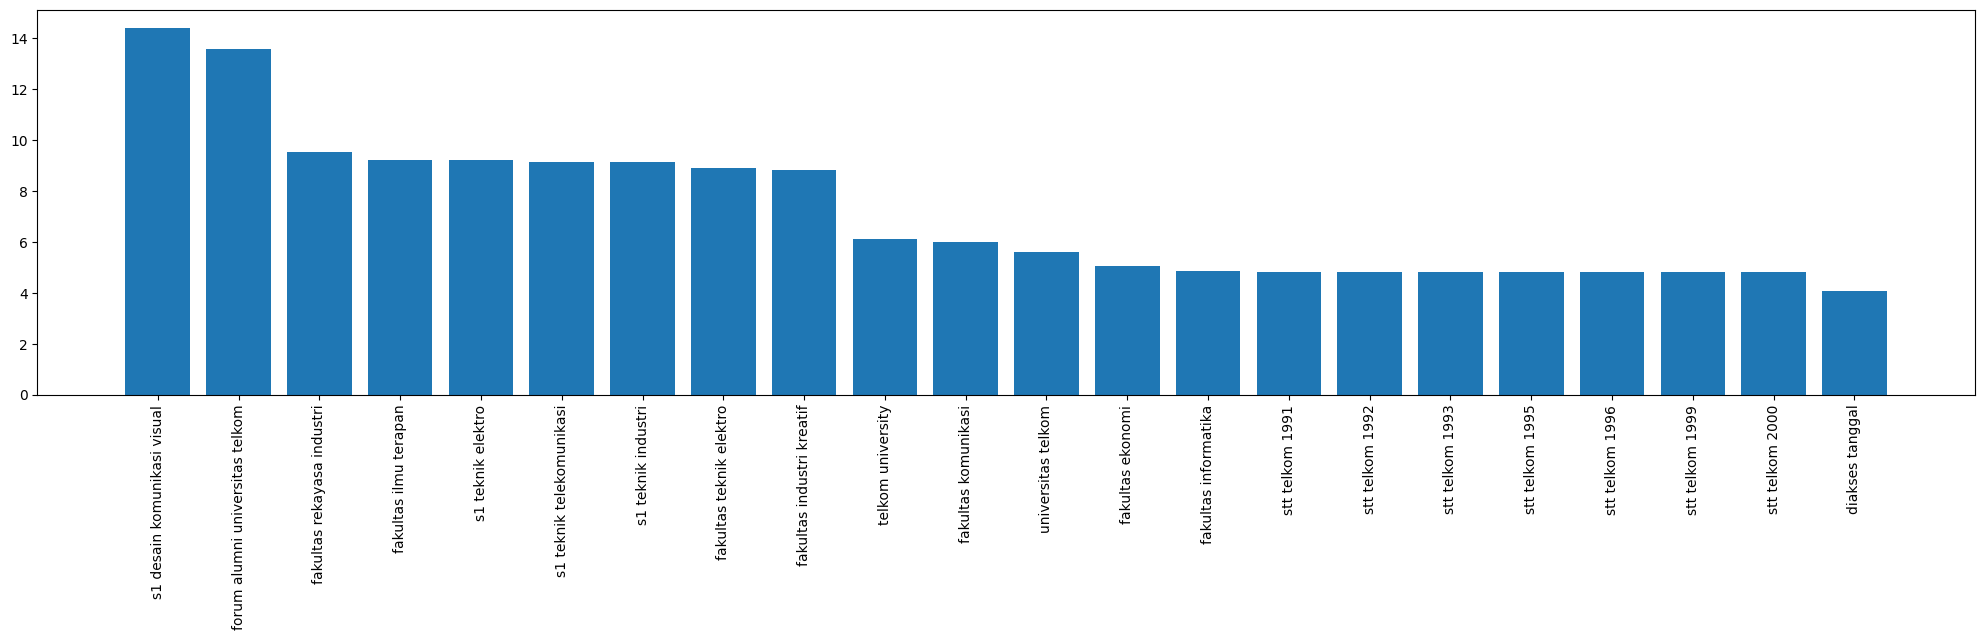

In [173]:
# dataviz using barplot
import matplotlib.pyplot as plt

# (*) means unpack
def plot(pair_list):
    keywords, relevance = zip(*processedText)
    fig = plt.figure(figsize = (25, 5))
    plt.bar(range(len(keywords)), relevance)
    plt.xticks(range(len(keywords)), keywords, rotation='vertical')
    plt.show()
    
plot(processedText)

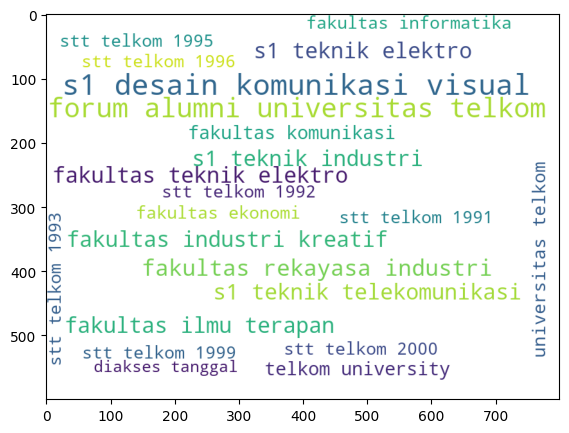

In [174]:
# dataviz using word cloud
from wordcloud import WordCloud

wordCloudViz = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize = (15, 5))
plt.imshow(wordCloudViz.generate_from_frequencies({keywords:relevance for keywords, relevance in processedText}))


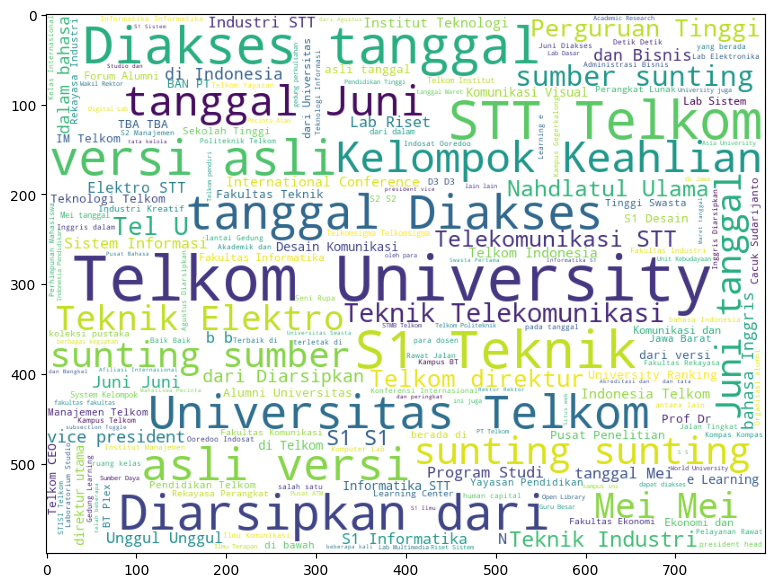

In [175]:
plt.figure(figsize=(15,7))
plt.imshow(wordCloudViz.generate(plainText))